In [ ]:
# ========== CELL 1: Setup & Install Dependencies ==========
print("=" * 60)
print("🚀 Setup YOLOv8 Training Environment")
print("=" * 60)

# Install Ultralytics
!pip install -q ultralytics

# Import libraries
from ultralytics import YOLO
import os
import yaml
from google.colab import drive, files
import shutil
from pathlib import Path
import torch

# Check GPU availability
print(f"\n✓ PyTorch version: {torch.__version__}")
print(f"✓ CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✓ GPU: {torch.cuda.get_device_name(0)}")
print()

🚀 Setup YOLOv8 Training Environment
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

✓ PyTorch version: 2.9.0+cu126
✓ CUDA available: True
✓ GPU: Tesla T4



In [ ]:
# ========== CELL 2: Mount Google Drive (OPSIONAL) ==========
print("📁 Mounting Google Drive...")
print("Pilih akun Google dan izinkan akses.")

try:
    drive.mount('/content/drive', force_remount=True)
    print("✓ Google Drive berhasil di-mount!")
    print("  Path: /content/drive/MyDrive/")
except Exception as e:
    print(f"⚠ Error mounting drive: {e}")
    print("  Anda bisa upload dataset manual di langkah berikutnya")

📁 Mounting Google Drive...
Pilih akun Google dan izinkan akses.
Mounted at /content/drive
✓ Google Drive berhasil di-mount!
  Path: /content/drive/MyDrive/


In [ ]:
# ========== CELL 3: Pilih Metode Upload Dataset ==========
print("\n" + "=" * 60)
print("📦 UPLOAD DATASET")
print("=" * 60)
print("\nPilih metode upload dataset:")
print("1. Upload file ZIP dari komputer (langsung ke Colab)")
print("2. Dari Google Drive (harus sudah di-upload sebelumnya)")
print("3. Download dari URL (Google Drive link, Dropbox, dll)")
print()

upload_method = input("Pilih metode (1/2/3): ").strip()

DATASET_PATH = "/content/dataset_daun_cengkeh"

if upload_method == "1":
    print("\n📤 Upload file ZIP dataset Anda...")
    uploaded = files.upload()

    # Extract ZIP
    zip_filename = list(uploaded.keys())[0]
    print(f"\n📦 Extracting {zip_filename}...")
    !unzip -q {zip_filename} -d {DATASET_PATH}
    print(f"✓ Dataset di-extract ke: {DATASET_PATH}")

elif upload_method == "2":
    gdrive_path = input("\nMasukkan path di Google Drive (contoh: MyDrive/dataset_cengkeh.zip): ").strip()
    full_path = f"/content/drive/{gdrive_path}"

    if gdrive_path.endswith('.zip'):
        print(f"\n📦 Extracting dari Google Drive...")
        !unzip -q "{full_path}" -d {DATASET_PATH}
    else:
        # Jika folder, copy langsung
        print(f"\n📂 Copying folder dari Google Drive...")
        shutil.copytree(full_path, DATASET_PATH)

    print(f"✓ Dataset siap di: {DATASET_PATH}")

elif upload_method == "3":
    dataset_url = input("\nMasukkan URL dataset (ZIP): ").strip()

    print(f"\n⬇️ Downloading dataset...")
    !wget -q "{dataset_url}" -O dataset.zip

    print(f"📦 Extracting...")
    !unzip -q dataset.zip -d {DATASET_PATH}

    print(f"✓ Dataset siap di: {DATASET_PATH}")

else:
    print("⚠ Pilihan tidak valid!")


📦 UPLOAD DATASET

Pilih metode upload dataset:
1. Upload file ZIP dari komputer (langsung ke Colab)
2. Dari Google Drive (harus sudah di-upload sebelumnya)
3. Download dari URL (Google Drive link, Dropbox, dll)

Pilih metode (1/2/3): 2

Masukkan path di Google Drive (contoh: MyDrive/dataset_cengkeh.zip): MyDrive/dataset_cengkeh.zip

📦 Extracting dari Google Drive...
✓ Dataset siap di: /content/dataset_daun_cengkeh


In [ ]:
# ========== CELL 4: Verifikasi Struktur Dataset ==========
print("\n" + "=" * 60)
print("🔍 VERIFIKASI STRUKTUR DATASET")
print("=" * 60)

def check_dataset_structure(dataset_path):
    """Memeriksa struktur folder dataset"""

    required_dirs = [
        'train/images',
        'train/labels',
        'val/images',
        'val/labels'
    ]

    print("\nStruktur yang dibutuhkan:")
    all_exist = True

    for dir_path in required_dirs:
        full_path = os.path.join(dataset_path, dir_path)
        exists = os.path.exists(full_path)
        status = "✓" if exists else "✗"

        if exists:
            file_count = len(os.listdir(full_path))
            print(f"{status} {dir_path} ({file_count} files)")
        else:
            print(f"{status} {dir_path} - TIDAK DITEMUKAN!")

        all_exist = all_exist and exists

    return all_exist

# Check struktur
is_valid = check_dataset_structure(DATASET_PATH)

if is_valid:
    print("\n✅ Struktur dataset VALID!")
else:
    print("\n⚠️ Struktur dataset TIDAK LENGKAP!")
    print("\nPastikan folder dataset memiliki struktur:")
    print("dataset_daun_cengkeh/")
    print("├── train/")
    print("│   ├── images/")
    print("│   └── labels/")
    print("└── val/")
    print("    ├── images/")
    print("    └── labels/")

# Tampilkan isi dataset
print("\n📊 Preview Dataset:")
!ls -lh {DATASET_PATH}/train/images | head -10


🔍 VERIFIKASI STRUKTUR DATASET

Struktur yang dibutuhkan:
✓ train/images (1951 files)
✓ train/labels (1951 files)
✓ val/images (238 files)
✓ val/labels (238 files)

✅ Struktur dataset VALID!

📊 Preview Dataset:
total 20M
-rw-rw-rw- 1 root root 9.4K Dec  2 14:40 IMG_20231213_125956_jpg.rf.3d2cce37e86d1155cb612e531c372d98.jpg
-rw-rw-rw- 1 root root 8.9K Dec  2 14:40 IMG_20231213_125956_jpg.rf.5b699e777dd941e748e25206e3b37db8.jpg
-rw-rw-rw- 1 root root 8.9K Dec  2 14:40 IMG_20231213_125956_jpg.rf.a2d698e633c6818ee2f348fa00e20fd9.jpg
-rw-rw-rw- 1 root root 9.4K Dec  2 14:40 IMG_20231213_130158_jpg.rf.5b7f89272972da82e43a80e51cb59de8.jpg
-rw-rw-rw- 1 root root 8.9K Dec  2 14:40 IMG_20231213_130158_jpg.rf.6a0b11c94565e3ef36bbb8c3cefc02cc.jpg
-rw-rw-rw- 1 root root 9.4K Dec  2 14:40 IMG_20231213_130158_jpg.rf.cb2039ad74496b4acaff8a80129514df.jpg
-rw-rw-rw- 1 root root 7.9K Dec  2 14:40 IMG_20231213_130402_jpg.rf.0403cd67b64d6dd5cc49576a6dc4a4ec.jpg
-rw-rw-rw- 1 root root 7.7K Dec  2 14:40 IMG

In [ ]:
# ========== CELL 5: Buat Konfigurasi Dataset ==========
print("\n" + "=" * 60)
print("⚙️ MEMBUAT KONFIGURASI DATASET")
print("=" * 60)

# Konfigurasi
CLASSES = ['sehat', 'cacat', 'bukan_daun_cengkeh']

def create_dataset_yaml(dataset_path, classes):
    """Membuat file data.yaml untuk YOLOv8"""

    yaml_content = {
        'path': dataset_path,
        'train': 'train/images',
        'val': 'val/images',
        'nc': len(classes),
        'names': classes
    }

    yaml_path = os.path.join(dataset_path, 'data.yaml')

    with open(yaml_path, 'w') as f:
        yaml.dump(yaml_content, f, default_flow_style=False)

    print(f"\n✓ File data.yaml berhasil dibuat!")
    print(f"  Path: {yaml_path}")

    # Tampilkan isi yaml
    print("\n📄 Isi data.yaml:")
    with open(yaml_path, 'r') as f:
        print(f.read())

    return yaml_path

yaml_path = create_dataset_yaml(DATASET_PATH, CLASSES)


⚙️ MEMBUAT KONFIGURASI DATASET

✓ File data.yaml berhasil dibuat!
  Path: /content/dataset_daun_cengkeh/data.yaml

📄 Isi data.yaml:
names:
- sehat
- cacat
- bukan_daun_cengkeh
nc: 3
path: /content/dataset_daun_cengkeh
train: train/images
val: val/images



In [ ]:
# ========== CELL 6: Konfigurasi Training ==========
print("\n" + "=" * 60)
print("🎯 KONFIGURASI TRAINING")
print("=" * 60)

# Parameter training
EPOCHS = 100
BATCH_SIZE = 16  # Sesuaikan dengan GPU (8/16/32)
IMG_SIZE = 640
MODEL_TYPE = 'yolov8n.pt'  # Pilihan: yolov8n/s/m/l/x

print(f"""
Konfigurasi Training:
- Model: {MODEL_TYPE}
- Epochs: {EPOCHS}
- Batch Size: {BATCH_SIZE}
- Image Size: {IMG_SIZE}
- Classes: {CLASSES}
- Device: {'GPU' if torch.cuda.is_available() else 'CPU'}
""")

# Buat folder untuk menyimpan hasil
PROJECT_NAME = "daun_cengkeh_runs"
os.makedirs(PROJECT_NAME, exist_ok=True)


# ========== CELL 7: TRAINING MODEL ==========
print("\n" + "=" * 60)
print("🏋️ MEMULAI TRAINING")
print("=" * 60)

# Load pretrained model
model = YOLO(MODEL_TYPE)

# Mulai training
results = model.train(
    data=yaml_path,
    epochs=EPOCHS,
    batch=BATCH_SIZE,
    imgsz=IMG_SIZE,
    project=PROJECT_NAME,
    name='exp',
    patience=50,  # Early stopping
    save=True,
    save_period=10,  # Simpan checkpoint setiap 10 epoch
    device=0,  # GPU
    workers=2,  # Untuk Colab
    optimizer='Adam',
    verbose=True,
    seed=42,
    deterministic=True,
    plots=True,

    # Data augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    copy_paste=0.0,
)

print("\n✅ TRAINING SELESAI!")


🎯 KONFIGURASI TRAINING

Konfigurasi Training:
- Model: yolov8n.pt
- Epochs: 100
- Batch Size: 16
- Image Size: 640
- Classes: ['sehat', 'cacat', 'bukan_daun_cengkeh']
- Device: GPU


🏋️ MEMULAI TRAINING
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_daun_cengkeh/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=t


📊 VALIDASI MODEL
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 313.4±81.3 MB/s, size: 8.2 KB)
val: Scanning /content/dataset_daun_cengkeh/val/labels.cache... 238 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 238/238 374.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 3.9it/s 3.8s
                   all        238        238      0.998          1      0.995      0.859
                 sehat         42         42      0.995          1      0.995      0.829
                 cacat         53         53      0.999          1      0.995      0.897
    bukan_daun_cengkeh        143        143          1          1      0.995       0.85
Speed: 4.1ms preprocess, 4.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/run

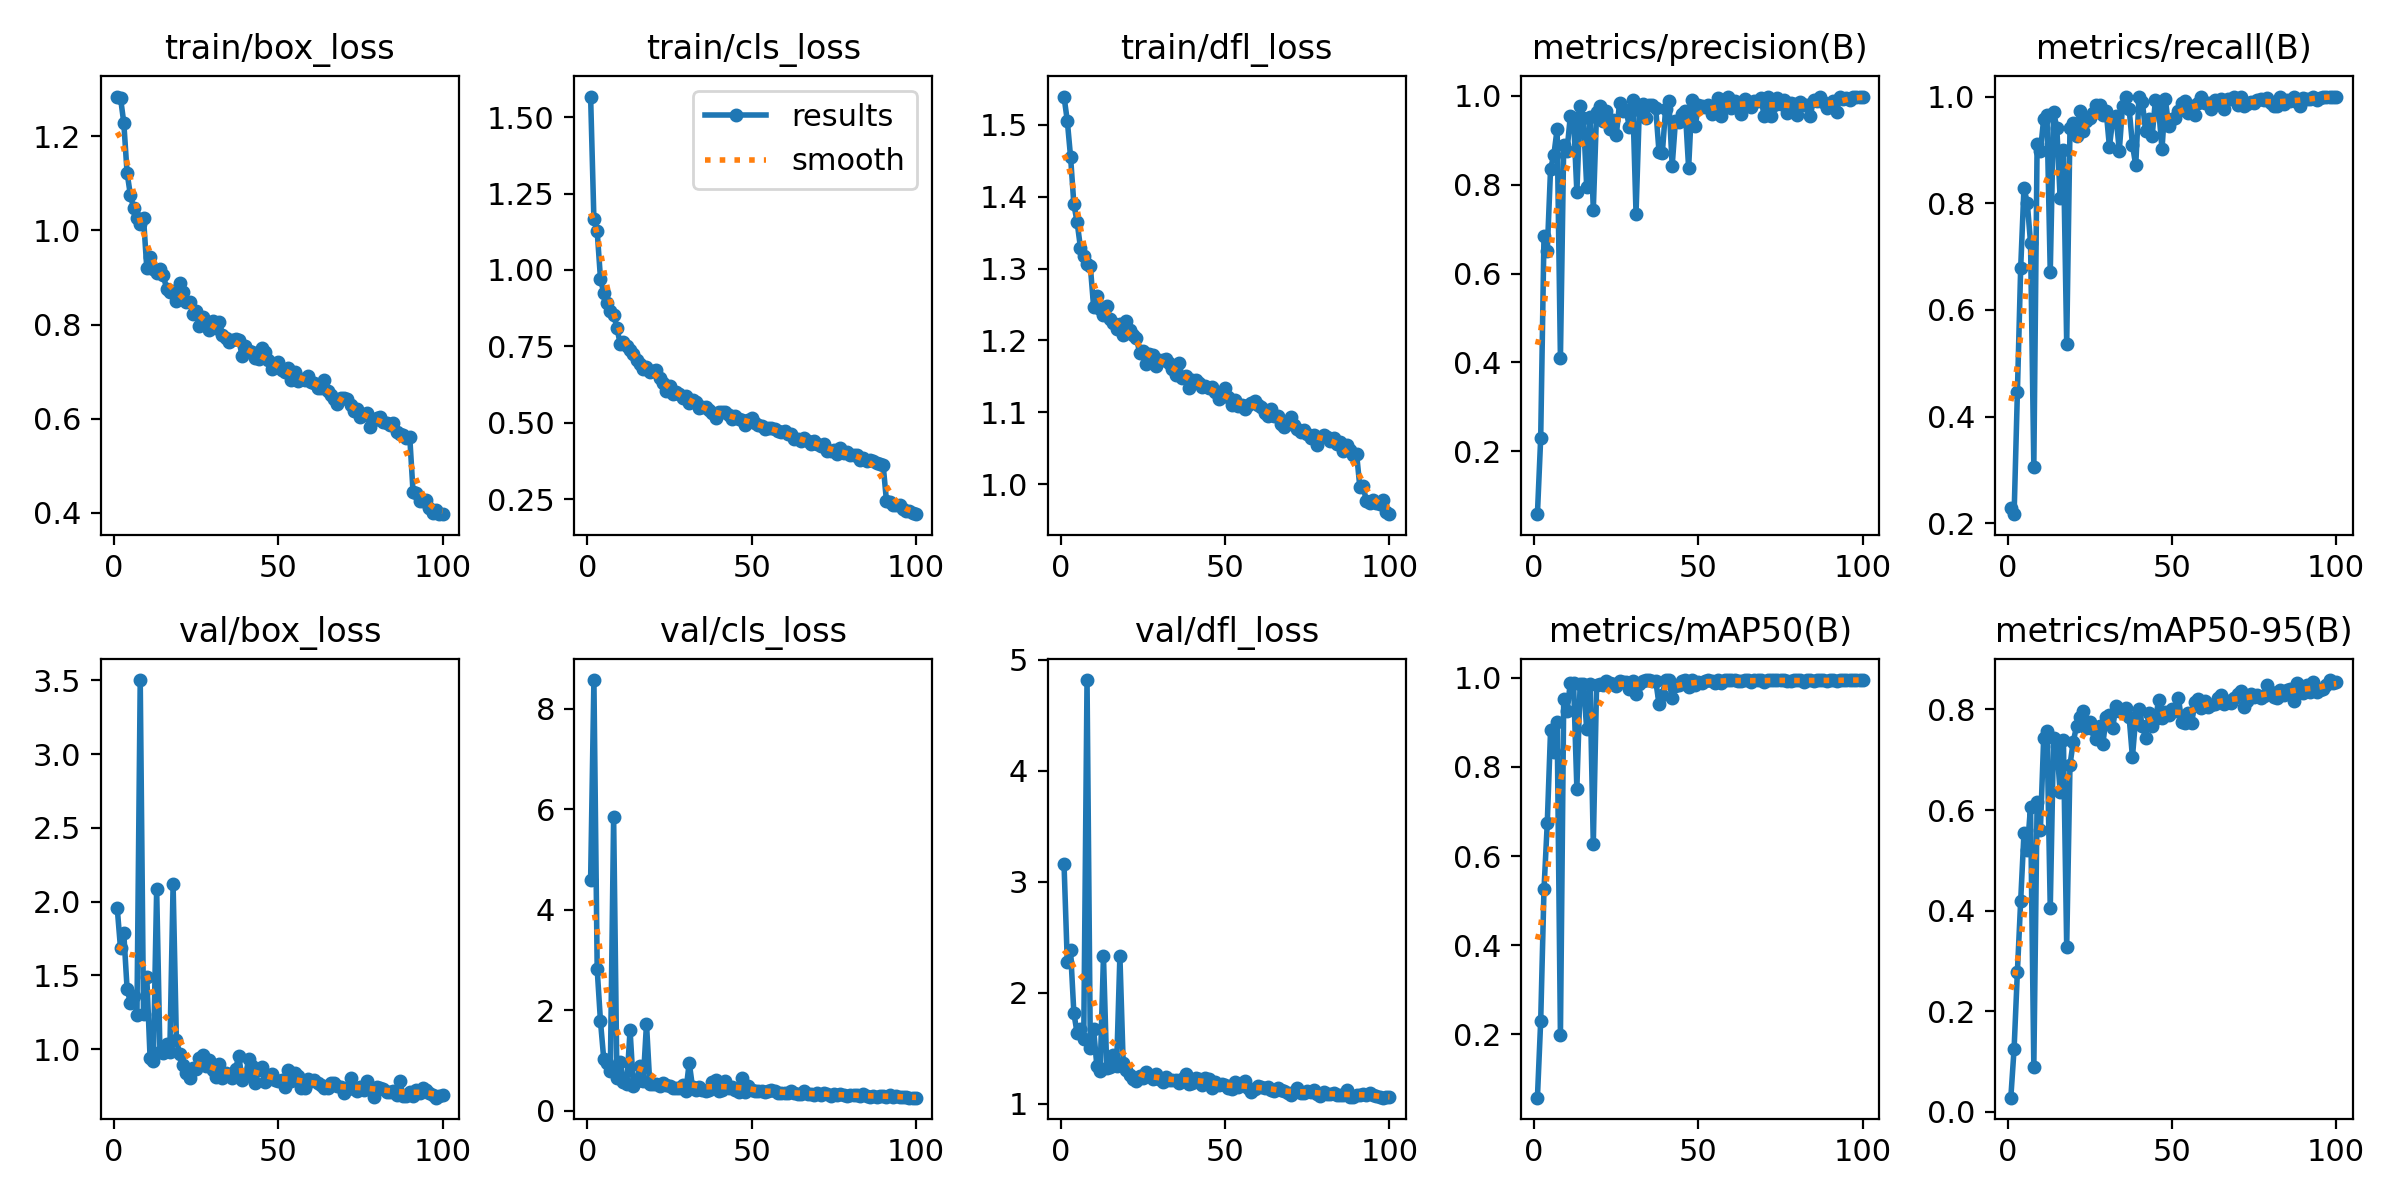


📊 Confusion Matrix:


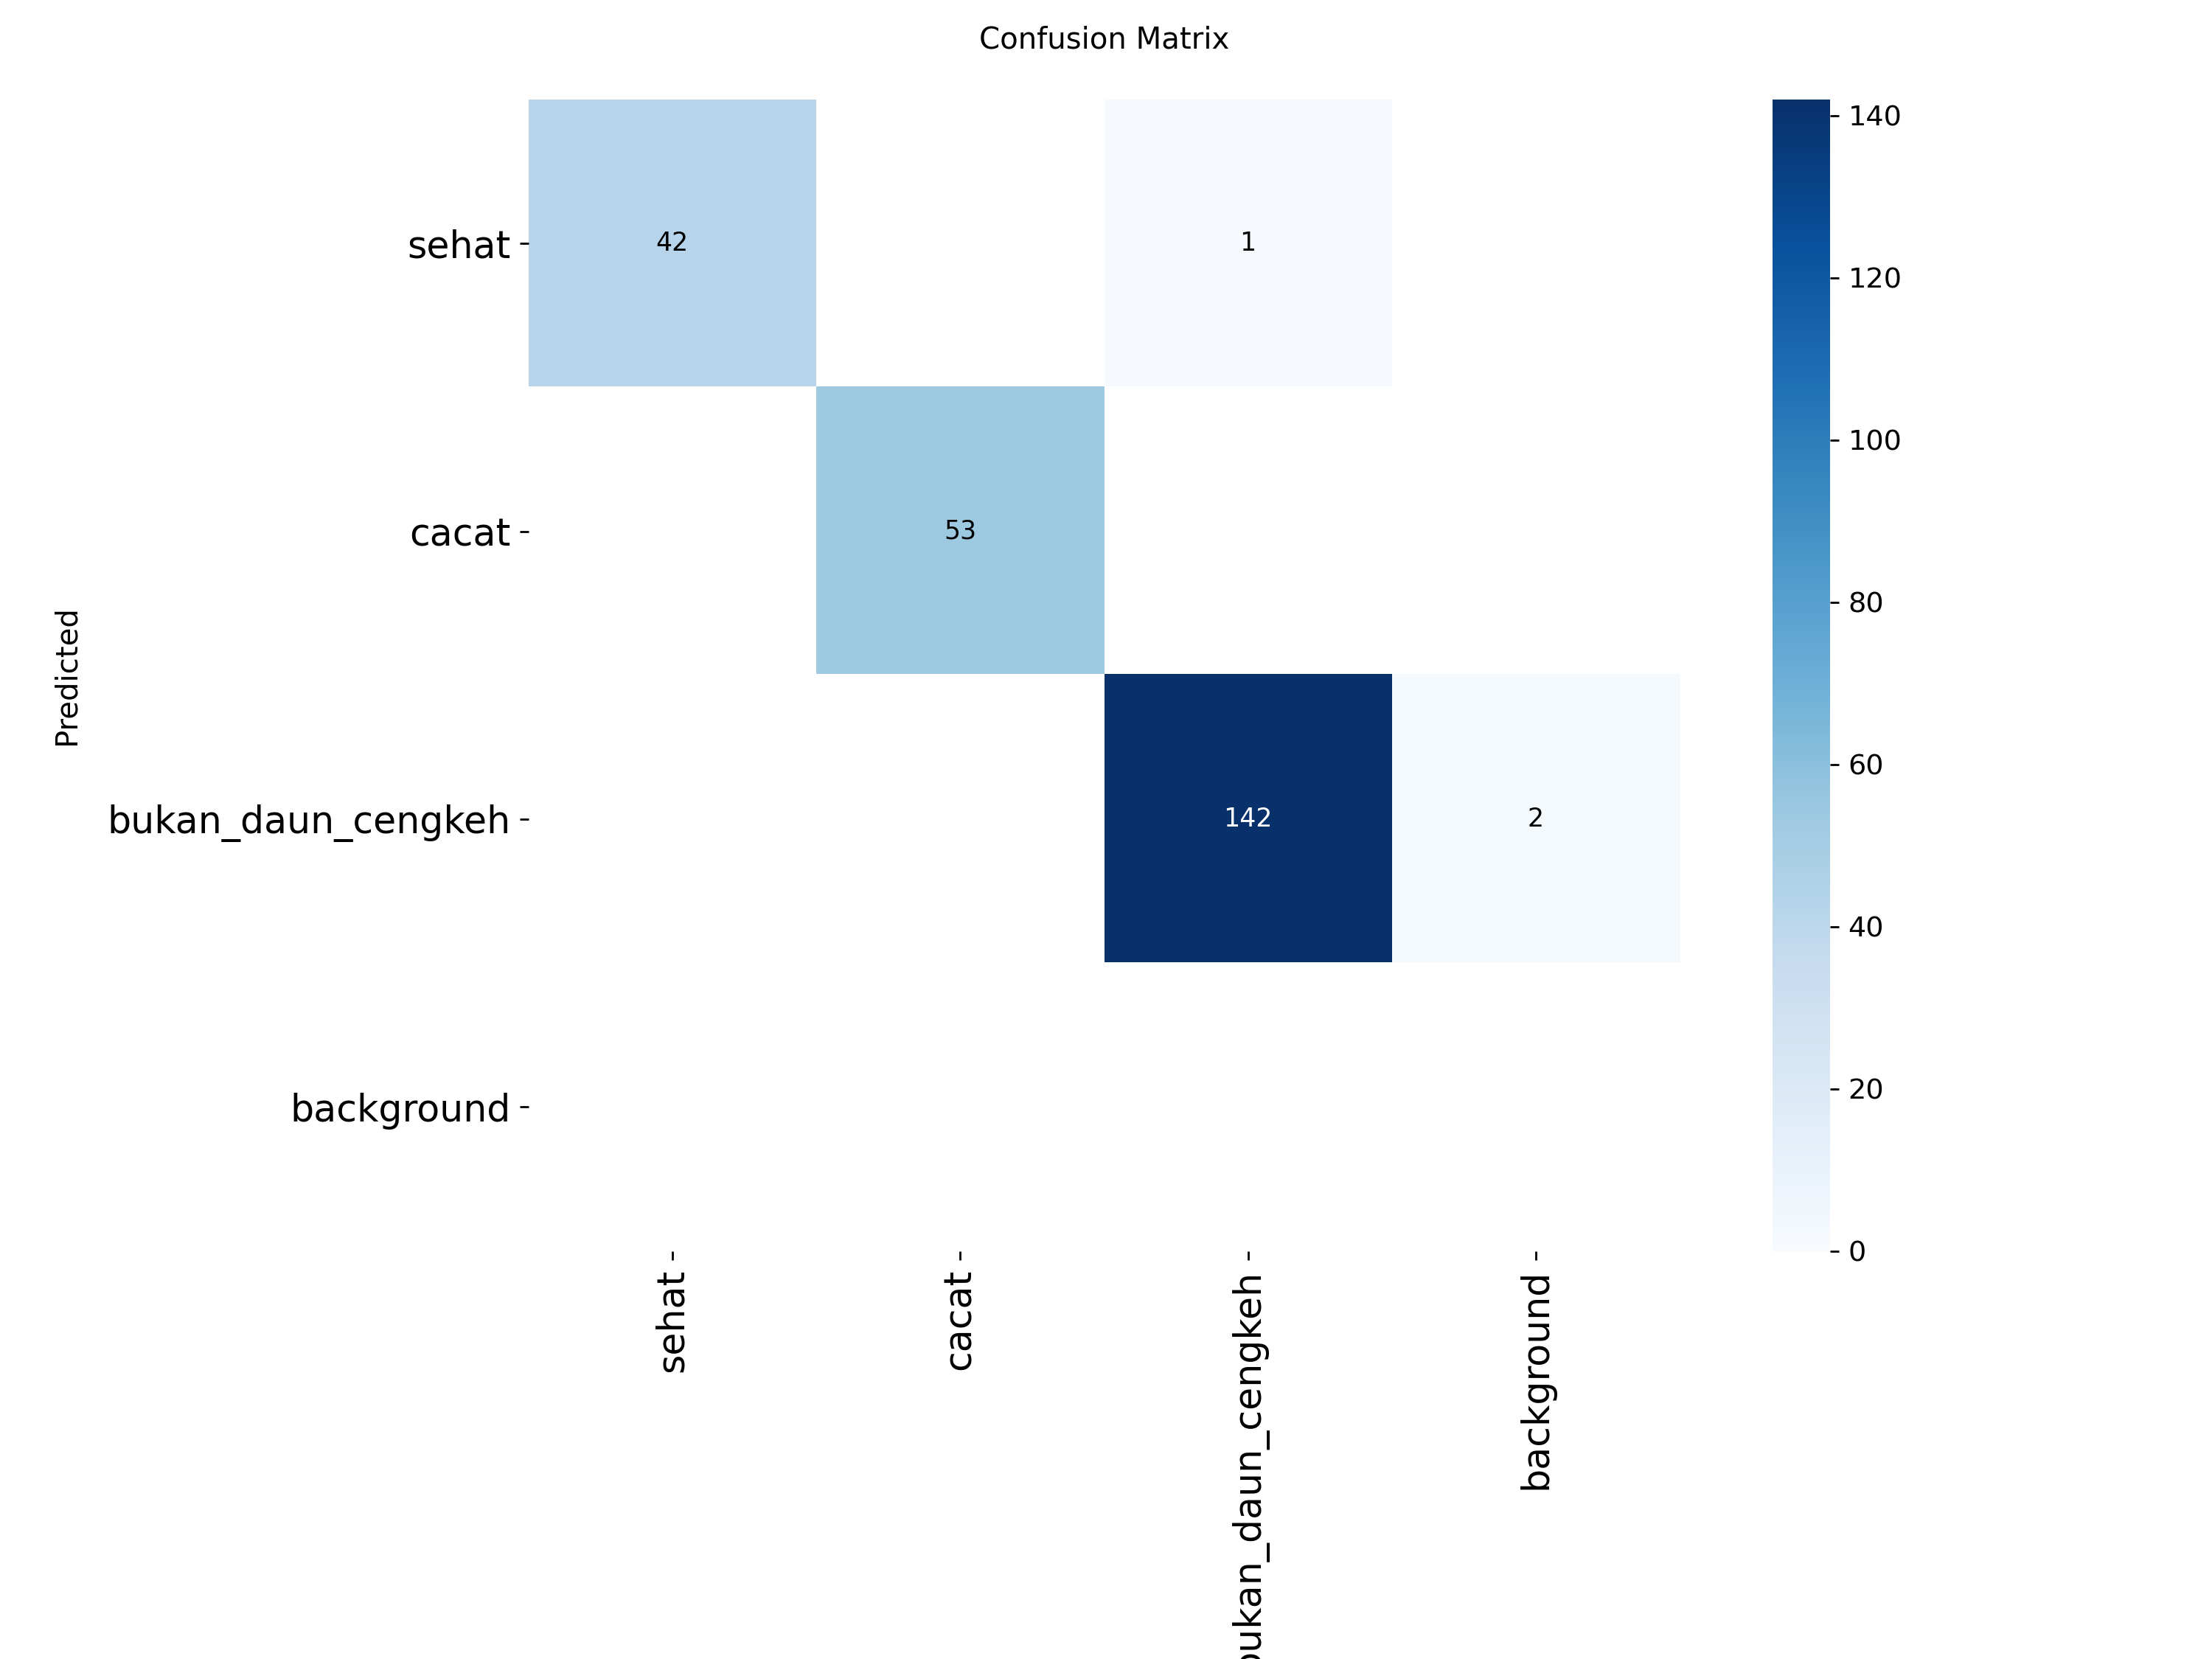

In [ ]:
# ========== CELL 8: Validasi & Evaluasi ==========
print("\n" + "=" * 60)
print("📊 VALIDASI MODEL")
print("=" * 60)

# Load best model
best_model_path = f"{PROJECT_NAME}/exp/weights/best.pt"
model = YOLO(best_model_path)

# Validasi
metrics = model.val()

print(f"\n📈 Hasil Validasi:")
print(f"  mAP50: {metrics.box.map50:.4f}")
print(f"  mAP50-95: {metrics.box.map:.4f}")
print(f"  Precision: {metrics.box.mp:.4f}")
print(f"  Recall: {metrics.box.mr:.4f}")

# Tampilkan grafik hasil training
from IPython.display import Image, display

print("\n📊 Grafik Training:")
results_img = f"{PROJECT_NAME}/exp/results.png"
if os.path.exists(results_img):
    display(Image(filename=results_img))

print("\n📊 Confusion Matrix:")
confusion_matrix_img = f"{PROJECT_NAME}/exp/confusion_matrix.png"
if os.path.exists(confusion_matrix_img):
    display(Image(filename=confusion_matrix_img))


🔮 TEST PREDIKSI
Testing pada 5 gambar sample...


image 1/1 /content/dataset_daun_cengkeh/val/images/IMG_20231214_130135_jpg.rf.870c6e112960a8ccfa1a87de0fd96126.jpg: 640x640 1 bukan_daun_cengkeh, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/dataset_daun_cengkeh/val/images/IMG_20240110_165454_jpg.rf.1e8f79aa79f1d0c0cb6ed194aa10557d.jpg: 640x640 1 sehat, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/dataset_daun_cengkeh/val/images/IMG_20231214_125234_jpg.rf.0041b5cd14480bd06f303bdee9fe25f8.jpg: 640x640 1 bukan_daun_cengkeh, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/dataset_daun_cengkeh/val/images/IMG_20231214_125449_jpg.rf.f1973218214713ed5c447c8533d788ee.jpg: 640x640 1 bukan_daun_cengkeh, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.0ms postprocess p

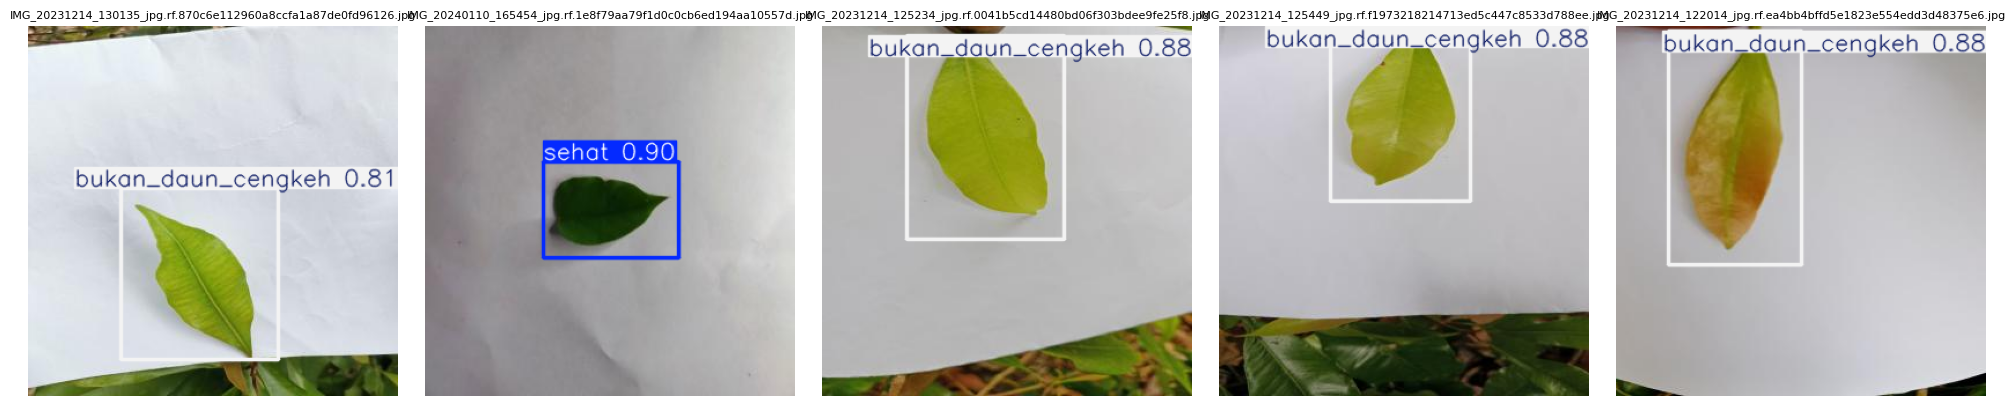

In [ ]:
# ========== CELL 9: Test Prediksi ==========
print("\n" + "=" * 60)
print("🔮 TEST PREDIKSI")
print("=" * 60)

# Ambil sample gambar dari validation set
import random
import cv2
import matplotlib.pyplot as plt

val_images_dir = f"{DATASET_PATH}/val/images"
sample_images = os.listdir(val_images_dir)[:5]  # Ambil 5 gambar

print(f"Testing pada {len(sample_images)} gambar sample...\n")

fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 4))

for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(val_images_dir, img_name)

    # Prediksi
    results = model.predict(img_path, conf=0.25)

    # Tampilkan hasil
    result_img = results[0].plot()

    if len(sample_images) == 1:
        ax = axes
    else:
        ax = axes[idx]

    ax.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(img_name, fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# ========== CELL 10: Export Model ==========
print("\n" + "=" * 60)
print("💾 EXPORT MODEL")
print("=" * 60)

# Export ke ONNX (untuk deployment)
print("\n📦 Exporting ke ONNX...")
model.export(format='onnx')

print("\n✓ Model berhasil di-export!")


💾 EXPORT MODEL

📦 Exporting ke ONNX...
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'daun_cengkeh_runs/exp/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 204ms
Prepared 6 packages in 11.67s
Installed 6 packages in 260ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.77

requirements: AutoUpdate success ✅ 12.8s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: s

In [ ]:
# ========== CELL 11: Download Model ke Komputer ==========
print("\n" + "=" * 60)
print("⬇️ DOWNLOAD MODEL")
print("=" * 60)

# Zip semua hasil training
output_zip = "daun_cengkeh_model.zip"

print(f"\n📦 Membuat ZIP file...")
!zip -r -q {output_zip} {PROJECT_NAME}/exp/weights

print(f"✓ File ZIP dibuat: {output_zip}")
print(f"  Size: {os.path.getsize(output_zip) / (1024*1024):.2f} MB")

# Download
print("\n⬇️ Downloading ke komputer Anda...")
files.download(output_zip)

print("\n" + "=" * 60)
print("✅ SEMUA PROSES SELESAI!")
print("=" * 60)
print(f"""
📦 Model tersimpan di:
  - Best model: {PROJECT_NAME}/exp/weights/best.pt
  - Last model: {PROJECT_NAME}/exp/weights/last.pt
  - ONNX: {PROJECT_NAME}/exp/weights/best.onnx

📊 Hasil training tersimpan di: {PROJECT_NAME}/exp/
  - results.png (grafik training)
  - confusion_matrix.png
  - PR_curve.png
  - dan lainnya

💡 Tips:
  - Simpan model di Google Drive agar tidak hilang
  - Download file ZIP yang berisi semua model
""")



⬇️ DOWNLOAD MODEL

📦 Membuat ZIP file...
✓ File ZIP dibuat: daun_cengkeh_model.zip
  Size: 147.11 MB

⬇️ Downloading ke komputer Anda...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ SEMUA PROSES SELESAI!

📦 Model tersimpan di:
  - Best model: daun_cengkeh_runs/exp/weights/best.pt
  - Last model: daun_cengkeh_runs/exp/weights/last.pt
  - ONNX: daun_cengkeh_runs/exp/weights/best.onnx

📊 Hasil training tersimpan di: daun_cengkeh_runs/exp/
  - results.png (grafik training)
  - confusion_matrix.png
  - PR_curve.png
  - dan lainnya

💡 Tips:
  - Simpan model di Google Drive agar tidak hilang
  - Download file ZIP yang berisi semua model



In [ ]:
# ========== CELL 12: Simpan ke Google Drive (OPSIONAL) ==========
print("\n💾 Menyimpan ke Google Drive...")

try:
    # Copy ke Google Drive
    gdrive_save_path = "/content/drive/MyDrive/yolov8_daun_cengkeh"

    if os.path.exists("/content/drive/MyDrive"):
        shutil.copytree(f"{PROJECT_NAME}/exp", gdrive_save_path, dirs_exist_ok=True)
        print(f"✓ Model berhasil disimpan ke Google Drive!")
        print(f"  Path: {gdrive_save_path}")
    else:
        print("⚠ Google Drive tidak ter-mount. Skip menyimpan ke Drive.")
except Exception as e:
    print(f"⚠ Error: {e}")


💾 Menyimpan ke Google Drive...
✓ Model berhasil disimpan ke Google Drive!
  Path: /content/drive/MyDrive/yolov8_daun_cengkeh
